## 전문가 지식 활용
* 특정한 애플리케이션을 위해 전문가의 지식(Expert Knowledge)을 사용할 수 있는 중요한 영역

In [1]:
import mglearn

citibike = mglearn.datasets.load_citibike()

print(f'citi bike data:\n{citibike.head()}')

citi bike data:
starttime
2015-08-01 00:00:00     3
2015-08-01 03:00:00     0
2015-08-01 06:00:00     9
2015-08-01 09:00:00    41
2015-08-01 12:00:00    39
Freq: 3H, Name: one, dtype: int64


Text(0, 0.5, 'number')

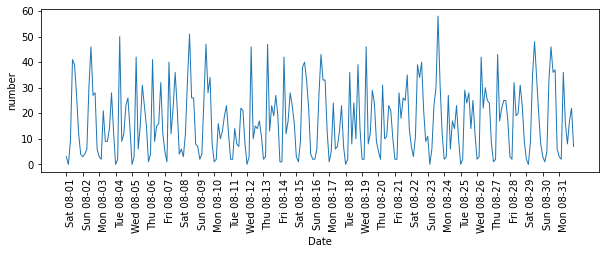

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(10, 3))
xticks = pd.date_range(start=citibike.index.min(), end=citibike.index.max(), freq='D')
week = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']
xticks_name = [week[int(w)] + d for w, d in zip(xticks.strftime('%w'), xticks.strftime(' %m-%d'))]
plt.xticks(xticks, xticks_name, rotation=90, ha='left')
plt.plot(citibike, linewidth=1)
plt.xlabel('Date')
plt.ylabel('number')

In [6]:
y = citibike.values
X = citibike.index.astype('int64').values.reshape(-1, 1) // 10 ** 9

In [10]:
n_train = 184

def eval_on_features(features, target, regressor):
    X_train, X_test = features[:n_train], features[n_train:]
    y_train, y_test = target[:n_train], target[n_train:]
    regressor.fit(X_train, y_train)
    print(f'test set R^2: {regressor.score(X_test, y_test)}')
    y_pred = regressor.predict(X_test)
    y_pred_train = regressor.predict(X_train)
    plt.figure(figsize=(10, 3))

    plt.xticks(range(0, len(X), 8), xticks_name, rotation=90, ha='left')

    plt.plot(range(n_train), y_train, label='train')
    plt.plot(range(n_train, len(y_test) + n_train), y_test, '-', label='test')
    plt.plot(range(n_train), y_pred_train, '--', label='train pred')

    plt.plot(range(n_train, len(y_test) + n_train), y_pred, '--', label='test pred')
    plt.legend(loc=(1.01, 0))
    plt.xlabel('date')
    plt.ylabel('number')

test set R^2: -0.035486463625959086


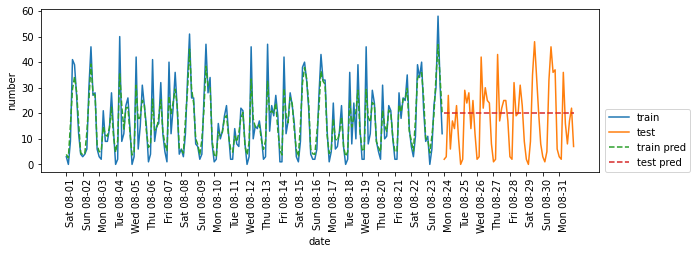

In [11]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
eval_on_features(X, y, regressor)

* 테스트 세트에 있는 POSIX 시간 특성의 값은 훈련 세트에 있는 특성 값의 범위 밖에 있다.
* 테스트 세트에 있는 데이터 포인트는 훈련 세트에 있는 모든 데이터보다 뒤의 시간.
* 트리 모델인 랜덤 포레스트는 훈련 세트에 있는 특성의 범위 밖으로 외삽(extrapolation)할 수 있는 능력이 없다.

test set R^2: 0.5995775993305429


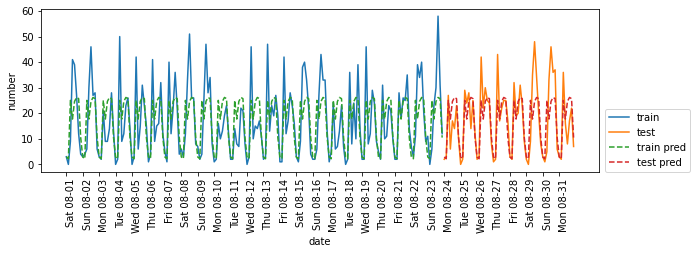

In [12]:
X_hour = citibike.index.hour.values.reshape(-1, 1)
eval_on_features(X_hour, y, regressor)

test set R^2: 0.8419488587966024


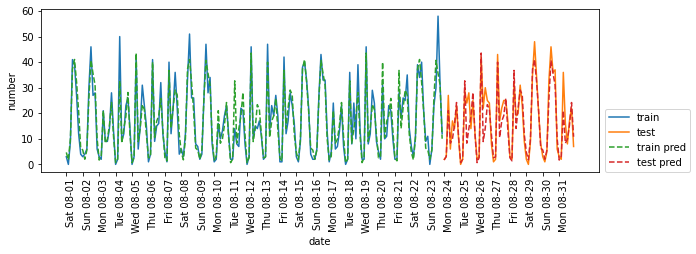

In [13]:
import numpy as np

X_hour_week = np.hstack([citibike.index.dayofweek.values.reshape(-1, 1), citibike.index.hour.values.reshape(-1, 1)])
eval_on_features(X_hour_week, y, regressor)

test set R^2: 0.13204157262163163


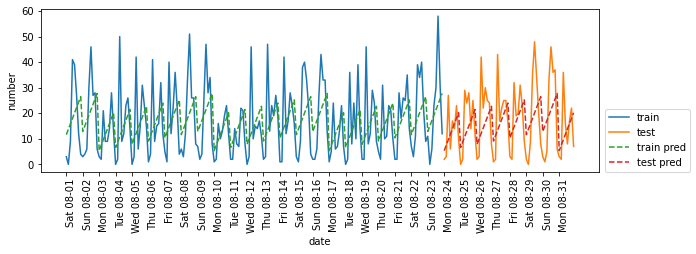

In [14]:
from sklearn.linear_model import LinearRegression
eval_on_features(X_hour_week, y, LinearRegression())

test set R^2: 0.6191139168658686


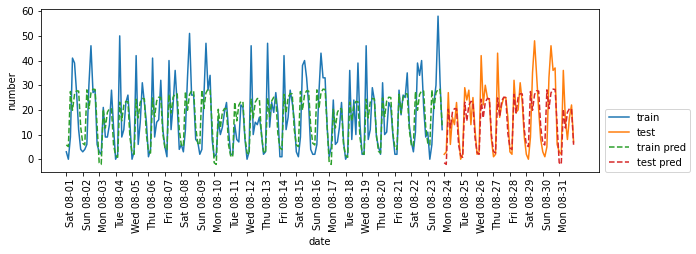

In [16]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Ridge

enc = OneHotEncoder()
X_hour_week_onehot = enc.fit_transform(X_hour_week).toarray()

eval_on_features(X_hour_week_onehot, y, Ridge())

test set R^2: 0.8451706357968557


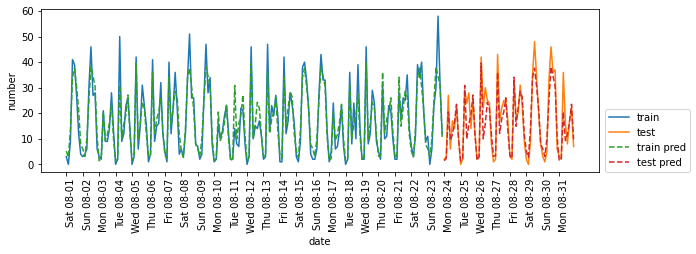

In [17]:
from sklearn.preprocessing import PolynomialFeatures

poly_transformer = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_hour_week_onehot_poly = poly_transformer.fit_transform(X_hour_week_onehot)
lr = Ridge()
eval_on_features(X_hour_week_onehot_poly, y, lr)

In [19]:
hour = ['%02d:00' % i for i in range(0, 24, 3)]
day = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
features = day + hour
features

['Mon',
 'Tue',
 'Wed',
 'Thu',
 'Fri',
 'Sat',
 'Sun',
 '00:00',
 '03:00',
 '06:00',
 '09:00',
 '12:00',
 '15:00',
 '18:00',
 '21:00']

In [21]:
features_poly = poly_transformer.get_feature_names(features)
features_nonzero = np.array(features_poly)[lr.coef_ != 0]
coef_nonzero = lr.coef_[lr.coef_ != 0]

Text(0, 0.5, 'coefficient size')

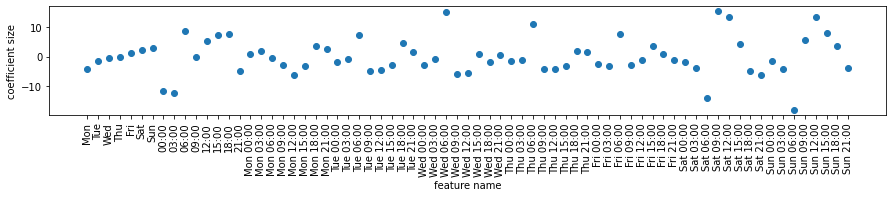

In [22]:
plt.figure(figsize=(15, 2))
plt.plot(coef_nonzero, 'o')
plt.xticks(np.arange(len(coef_nonzero)), features_nonzero, rotation=90)
plt.xlabel('feature name')
plt.ylabel('coefficient size')

# 모델 평가와 성능 향상

In [23]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X, y = make_blobs(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
logreg = LogisticRegression().fit(X_train, y_train)
print(f'test set score: {logreg.score(X_test, y_test)}')

test set score: 0.88


* 데이터를 훈련 세트와 트스트 세트로 나누는 이유는 지금까지 본 적 없는 새로운 데이터에 모델이 얼마나 잘 일반화되는지 측정하기 위해서.
* 모델이 훈련 세크에 잘 맞는 것보다, 학습 과정에 없던 데이터에 대해 예측을 얼마나 잘 하느냐가 중요하다.

## 교차 검증 (cross-validation)
* 일반화 성능을 재기 위해 훈련 세트와 테스트 세트로 한 번 나누는 것보다 더 안정적이고 뛰어난 통계적 평가 방법.
* k-겹 교차 검증 (k-fold cross-validation)

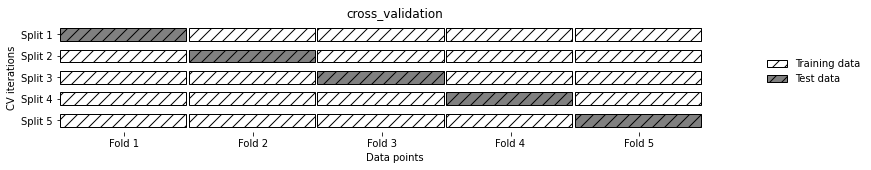

In [24]:
mglearn.plots.plot_cross_validation()

### scikit-learn의 교차 검증

In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
logreg = LogisticRegression(max_iter=1000)

scores = cross_val_score(logreg, iris.data, iris.target)
print('cross validation score:', scores)

cross validation score: [0.96666667 1.         0.93333333 0.96666667 1.        ]


In [26]:
scores = cross_val_score(logreg, iris.data, iris.target, cv=10)
print('cross validation score:', scores)

cross validation score: [1.         0.93333333 1.         1.         0.93333333 0.93333333
 0.93333333 1.         1.         1.        ]


In [27]:
print('cross validation mean score:', scores.mean())

cross validation mean score: 0.9733333333333334


In [28]:
from sklearn.model_selection import cross_validate
res = cross_validate(logreg, iris.data, iris.target, return_train_score=True)
res

{'fit_time': array([0.00897026, 0.01096272, 0.00797343, 0.00797272, 0.00897026]),
 'score_time': array([0.       , 0.       , 0.0009973, 0.       , 0.       ]),
 'test_score': array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ]),
 'train_score': array([0.96666667, 0.96666667, 0.98333333, 0.98333333, 0.975     ])}

In [29]:
import pandas as pd

res_df = pd.DataFrame(res)
res_df
print(f'avg time and score:\n{res_df.mean()}')

avg time and score:
fit_time       0.008970
score_time     0.000199
test_score     0.973333
train_score    0.975000
dtype: float64


### 교차 검증의 장점
* 테스트 세트에 각 샘플이 정확하게 한 번씩 들어간다.
* 교차 검증의 점수를 (그리고 평균값) 높이기 위해서는 데이터셋에 있는 모든 샘플에 대해 모델이 잘 일반화되어야 한다.
* 모델이 훈련 데이터에 얼마나 민감한지 알 수 있다.
* 분할을 한 번 했을 때보다 데이터를 더 효과적으로 사용할 수 있다.
    * train_test_split을 사용하면 보통 데이터 중 75%를 훈련 세트로 사용.
    * 5-겹 교차 검증이면 데이터의 80%를 모델학습에 사용.
* 주요 단점은 연산 비용이 늘어난다.

### 계층별 k-겹 교차 검증과 그외 전략들

In [30]:
from sklearn.datasets import load_iris

iris = load_iris()
print(f'iris label:\n{iris.target}')

iris label:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


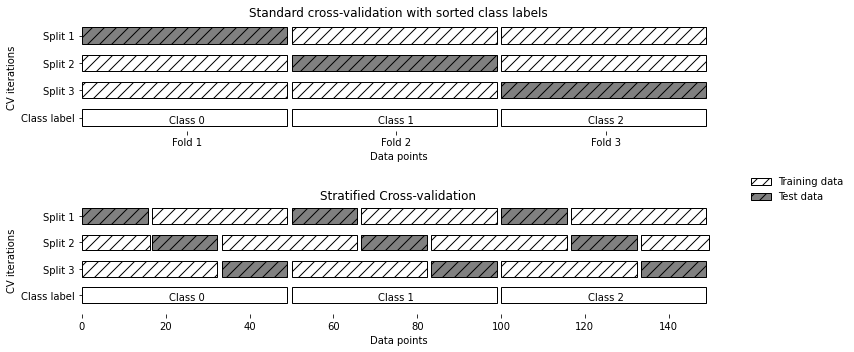

In [31]:
mglearn.plots.plot_stratified_cross_validation()

* 교차 검증 상세 옵션

In [32]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=5)

In [33]:
print(f'cross validation score:\n{cross_val_score(logreg, iris.data, iris.target, cv=kfold)}')

cross validation score:
[1.         1.         0.86666667 0.93333333 0.83333333]


In [34]:
kfold = KFold(n_splits=3)
print(f'cross validation score:\n{cross_val_score(logreg, iris.data, iris.target, cv=kfold)}')

cross validation score:
[0. 0. 0.]


In [35]:
kfold = KFold(n_splits=3, shuffle=True, random_state=0)
print(f'cross validation score:\n{cross_val_score(logreg, iris.data, iris.target, cv=kfold)}')

cross validation score:
[0.98 0.96 0.96]


* LOOCV (Leave-one-out cross-validation)
    * 폴드 하나에 샘플 하나만 들어 있는 k-겹 교차 검증으로 생각할 수 있다.
    * 각 반복에서 하나의 데이터 포인트를 선택해 테스트 세트로 사용.
    * 데이터셋이 클 때는 시간이 매우 오래 걸리지만, 작은 데이터셋에서는 이따금 더 좋은 결과를 만들어낸다.

In [36]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(logreg, iris.data, iris.target, cv=loo)
print('cross validation split num:', len(scores))
print(f'mean acc: {scores.mean()}')

cross validation split num: 150
mean acc: 0.9666666666666667


* 임의 분할 교차 검증 (shuffle-split cross-validation)
    * train_size만큼의 포인트로 흔련 세트를 만들고, test_size만큼의 (훈련세트와 중첩되지 않은) 포인트로 테스트 세트를 만들도록 분할.
    * n_splits 횟수만큼 반복.

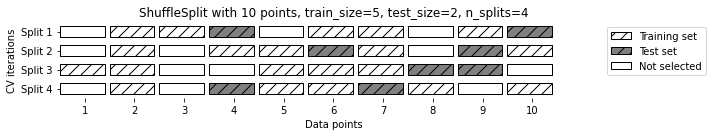

In [37]:
mglearn.plots.plot_shuffle_split()

In [38]:
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)
scores = cross_val_score(logreg, iris.data, iris.target, cv=shuffle_split)
print(f'cross validation score:\n{scores}')

cross validation score:
[0.96       1.         0.94666667 0.94666667 0.97333333 0.97333333
 0.97333333 0.98666667 0.97333333 0.94666667]


* 임의 분할 교차 검증은 반복 횟수를 훈련 세트나 테스트 세트의 크기와 독립적으로 조절해야 할 때 유용.
* 데이터를 부분 샘플링(subsampling)하는 방식은 대규모 데이터 셋으로 작업할 때 도움이 된다.

* 그룹별 교차 검증
    * GroupKFold
    * groups 배열은 훈련 세트와 테스크 세트를 만들 때 분리되지 않아야 할 그룹을 지정하는 것.
    * 클래스 레이블과 혼동해서는 안된다.

In [39]:
from sklearn.model_selection import GroupKFold

X, y = make_blobs(n_samples=12, random_state=0)

groups = [0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3]
scores = cross_val_score(logreg, X, y, groups=groups, cv=GroupKFold(n_splits=3))
print(f'cross validation score:\n{scores}')

cross validation score:
[0.75       0.6        0.66666667]


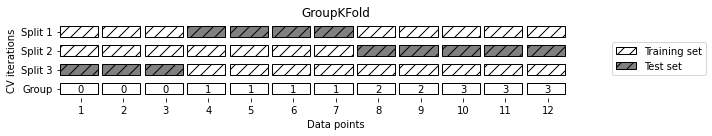

In [40]:
mglearn.plots.plot_group_kfold()

### 반복 교차 검증
* 데이터셋의 크기가 크지 ㅍ옣을 경우 안정된 검증 점수를 얻기 위해 교차 검증을 반복하여 여러 번 수행하는 경우가 많다.
* RepeatedKFold, RepeatedStratifiedKFold

In [41]:
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
logreg = LogisticRegression(max_iter=1000)

In [42]:
from sklearn.model_selection import RepeatedStratifiedKFold

rskfold = RepeatedStratifiedKFold(random_state=42)
scores = cross_val_score(logreg, iris.data, iris.target, cv=rskfold)

print(f'cross validation score:\n{scores}')
print(f'cross validation score: {scores.mean()}')

cross validation score:
[1.         0.96666667 0.93333333 1.         0.93333333 0.96666667
 0.96666667 0.93333333 1.         0.96666667 0.93333333 1.
 1.         0.96666667 0.96666667 0.9        1.         1.
 0.93333333 0.96666667 0.93333333 0.96666667 0.96666667 1.
 0.96666667 1.         0.96666667 0.96666667 0.9        1.
 0.96666667 0.96666667 0.96666667 0.96666667 0.93333333 0.96666667
 0.96666667 1.         1.         0.9        0.96666667 1.
 0.9        0.96666667 0.96666667 0.9        0.96666667 0.96666667
 1.         0.96666667]
cross validation score: 0.9646666666666667
